In [22]:
import pandas as pd

from redesneuronales.redes import y_train

df = pd.read_csv('HateSpeech (1) (1).csv')
df.head()

ModuleNotFoundError: No module named 'redesneuronales.redes'

In [23]:
df = df[['class', 'tweet']]
df.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [11]:
df['class'].unique()

array([2, 1, 0])

<Axes: xlabel='class'>

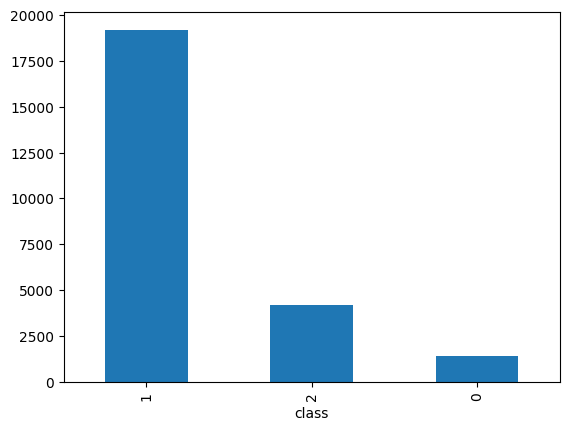

In [24]:
df['class'].value_counts().plot(kind='bar')

In [25]:
import spacy
nlp = spacy.load('en_core_web_sm')


In [26]:
import contractions
import re
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from tqdm import tqdm
import spacy

# Descargar recursos de NLTK
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# spaCy: cargar modelo grande de inglés
import spacy
nlp = spacy.load("en_core_web_lg")

# Configurar stopwords y lematizador
stopwords_en = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

tqdm.pandas()

# Función de preprocesamiento
def preprocess(text):
    # Expandir contracciones
    text = contractions.fix(text)
    # Quitar caracteres especiales y números
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    # Tokenizar
    tokens = word_tokenize(text.lower())
    # Quitar stopwords y lematizar
    tokens = [lemmatizer.lemmatize(t) for t in tokens if t not in stopwords_en]
    return " ".join(tokens)

# Vectorización con spaCy
def vectorize(text):
    doc = nlp(text)
    return doc.vector  # retorna el vector del documento (promedio de tokens)

# Aplicación en el DataFrame
df['clean_tweet'] = df['tweet'].progress_apply(preprocess)
df['vector'] = df['clean_tweet'].progress_apply(vectorize)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jorge\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jorge\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jorge\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
100%|██████████| 24783/24783 [04:12<00:00, 98.33it/s] 


In [19]:
from tqdm import tqdm
tqdm.pandas()
df['vector'] = df['tweet'].progress_apply(vectorize)

100%|██████████| 24783/24783 [04:17<00:00, 96.34it/s] 


In [20]:
df.head()

,class,tweet,clean_tweet,vector
0,2,!!! RT @mayasolovely: As a woman you shouldn't...,rt mayasolovely woman complain cleaning house ...,"[-0.07505301, 0.1915238, -0.12692589, -0.06303..."
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,rt mleew boy dat coldtyga dwn bad cuffin dat h...,"[-0.12701173, 0.11966555, 0.07483304, -0.22008..."
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,rt urkindofbrand dawg rt sbabylife ever fuck b...,"[-0.19659114, 0.1531408, -0.009106409, -0.1411..."
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,rt cganderson vivabased look like tranny,"[-0.117813505, 0.1942591, 0.040762678, -0.1087..."
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,rt shenikaroberts shit hear might true might f...,"[-0.15921175, 0.22921783, -0.036085773, -0.115..."


In [ ]:
from sklearn import preprocessing
    x = df['vector']
    y= np.concatenate(X,axis=0)

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['class'])
y_train = to_categorical(y_encoded)  # Convertir a one-hot encoding


In [ ]:
y_train

In [ ]:
model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=300))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=3, activation='softmax'))
model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])




In [ ]:
history = model.fit(x_train,
                    y_train,
                    batch_size=10,
                    epochs=10,
                    validation_data=(x_test,y_test))

In [ ]:
sns.lineplot(data=metrics)

In [27]:
y_pred = model.predict(X_test)
y_pred

NameError: name 'model' is not defined